In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from uproot_io import Events, View
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Interaction type lookup
import csv
interaction_dictionary = {}
with open('interactions.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        key = int(row.pop('Idx'))
        interaction = row.pop('Interaction')
        interaction_dictionary[key] = interaction
# print(interaction_dictionary)

In [3]:
events = Events("/Users/mohammed/code/PandoraRecoFile_1.root")

In [4]:
events.event_number

array([   0,    0,    0, ..., 9208, 9208, 9208], dtype=int32)

In [5]:
events.mc_pdg

array([  22,   22, 2212, ...,   22,   22,   22], dtype=int32)

In [6]:
# def plotparticles(event_number):
#     idx = np.where(events.event_number == event_number)[0]
    
#     residuals = np.array([])
    
#     for i in idx:
#         x = events.reco_hits_x_w[i]
#         z = events.reco_hits_w[i]
#         pdg = events.mc_pdg[i]
        
#         if x.size == 0:
#             continue
            
#         else:
#             m, c = np.polyfit(x, z, 1)
        
#         pred = m * x + c
#         resd = np.mean(np.abs(z - pred))
#         residuals = np.append(residuals, resd)

        
# #         plt.scatter(x, z, s=10)
# #         plt.plot(x, pred)
# #         print(f"Particle {i} and Particle type {pdg}: {resd}")
    
#     vx = events.true_neutrino_vtx_x[idx[0]]
#     vz = events.true_neutrino_vtx_w[idx[0]]
# #     plt.scatter(vx, vz, c='red', s=50)
    
#     typ = events.interaction_type[idx[0]]
#     name = interaction_dictionary[typ]
    
# #     plt.title(f'Interaction Type: {name}')
# #     plt.xlabel('Time')
# #     plt.ylabel('W Wire')
    
#     return residuals

In [7]:
# eventNumbers = list(set(events.event_number))
# # print(eventNumbers)

In [ ]:
# r = []
# for i in eventNumbers:
#     r = np.append(r, plotparticles(i))

In [ ]:
# %matplotlib notebook

# plt.hist(r, 21)

In [21]:
# TRYING AGAIN: 26th October 2023

def plotparticles(event_number):
    idx = np.where(events.event_number == event_number)[0]
    
    residuals = np.array([])
    particleType = np.array([])
    weights = np.array([])
    
    for i in idx:
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        pdg = events.mc_pdg[i]
        
        if x.size == 0:
            continue
            
        else:
            m, c = np.polyfit(x, z, 1)
        
        residual = (np.abs(z - (m * x + c))) / (np.sqrt(1 + m**2))
        avg = (np.sum(residual))/(len(residual))
        residuals = np.append(residuals, avg)
        
        particleType = np.append(particleType, pdg)
        
        weight = 1.0 / (residual + 1e-6)
        weights = np.append(weights, weight)
        
        weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
        
#         plt.figure()
#         plt.scatter(x, z, s=10)
#         plt.plot(x, weighted_m*x+weighted_c)
#         plt.title(f'Residual: {residuals[i]}')
#         print(f"Particle {i} and Particle type {pdg}: {resd}")
    
#     vx = events.true_neutrino_vtx_x[idx[0]]
#     vz = events.true_neutrino_vtx_w[idx[0]]
#     plt.scatter(vx, vz, c='red', s=50)
    
    typ = events.interaction_type[idx[0]]
    name = interaction_dictionary[typ]
    
#     plt.title(f'Interaction Type: {name}')
#     plt.xlabel('Time')
#     plt.ylabel('W Wire')
    
    return residuals, particleType

In [22]:
%matplotlib inline
plotparticles(1)

(array([11.38122845,  0.28417516,  0.25190542,  0.58279248,  0.08932621,
         0.15488164,  3.90772288]),
 array([  22.,    0.,  211., 2212.,   13.,    0.,    0.]))

In [8]:
eventNumbers = list(set(events.event_number))

In [23]:
r = []
p = []
for i in eventNumbers:
    r = np.append(r, plotparticles(i)[0])
    p = np.append(p, plotparticles(i)[1])

/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/

/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/

/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/

/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/

/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/

/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/1269959862.py:30: RankWarning: Polyfit may be poorly conditioned
  weighted_m, weighted_c = np.polyfit(x, z, 1, w=weight)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/

In [26]:
print(r.shape, p.shape)

(45627,) (45627,)


In [32]:
print(list(set(p)), len(list(set(p))))

[0.0, 321.0, 2212.0, 1000010020.0, 3112.0, 1000020040.0, 11.0, 13.0, -211.0, 211.0, -13.0, -11.0, 22.0, 3222.0, 1000140280.0, -2212.0, 1000020030.0, -321.0] 18


In [111]:
# protons = 2212
# muons = 13
# electrons = 11

mapping = {11: 'electron', 13: 'muon', 2212: 'proton', -11: 'aelectron', -13: 'amuon', -2212: 'aproton'}
mapping2 = {11: 'shower', 13: 'track', 2212: 'track', -11: 'shower', -13: 'track', -2212: 'track'}

In [112]:
df = pd.DataFrame({"residual": r, "particle": p})
df

,residual,particle
0,0.401523,22.0
1,0.171312,22.0
2,0.417919,2212.0
3,0.619989,13.0
4,0.014895,0.0
...,...,...
45622,39.103770,11.0
45623,3.926338,22.0
45624,0.254913,22.0
45625,0.078577,22.0


In [113]:
df['name'] = df['particle'].map(mapping)
df['type'] = df['particle'].map(mapping2)
df

,residual,particle,name,type
0,0.401523,22.0,NaN,NaN
1,0.171312,22.0,NaN,NaN
2,0.417919,2212.0,proton,track
3,0.619989,13.0,muon,track
4,0.014895,0.0,NaN,NaN
...,...,...,...,...
45622,39.103770,11.0,electron,shower
45623,3.926338,22.0,NaN,NaN
45624,0.254913,22.0,NaN,NaN
45625,0.078577,22.0,NaN,NaN


In [114]:
df = df.dropna()
df

,residual,particle,name,type
2,0.417919,2212.0,proton,track
3,0.619989,13.0,muon,track
5,0.042118,2212.0,proton,track
6,0.010412,2212.0,proton,track
7,0.017887,2212.0,proton,track
...,...,...,...,...
45608,2.341339,11.0,electron,shower
45611,0.157120,2212.0,proton,track
45620,0.133985,2212.0,proton,track
45621,6.380422,2212.0,proton,track


In [115]:
mapping3 = {'track': 0, 'shower': 1}
# df1 = df
df['class'] = df['type'].map(mapping3)

df

/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_59704/339389884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['type'].map(mapping3)


,residual,particle,name,type,class
2,0.417919,2212.0,proton,track,0
3,0.619989,13.0,muon,track,0
5,0.042118,2212.0,proton,track,0
6,0.010412,2212.0,proton,track,0
7,0.017887,2212.0,proton,track,0
...,...,...,...,...,...
45608,2.341339,11.0,electron,shower,1
45611,0.157120,2212.0,proton,track,0
45620,0.133985,2212.0,proton,track,0
45621,6.380422,2212.0,proton,track,0


In [116]:
columns = ['residual', 'class']
df = df[columns]
df

,residual,class
2,0.417919,0
3,0.619989,0
5,0.042118,0
6,0.010412,0
7,0.017887,0
...,...,...
45608,2.341339,1
45611,0.157120,0
45620,0.133985,0
45621,6.380422,0


In [117]:
df = df.reset_index(inplace=False, drop=True)
df

,residual,class
0,0.417919,0
1,0.619989,0
2,0.042118,0
3,0.010412,0
4,0.017887,0
...,...,...
24693,2.341339,1
24694,0.157120,0
24695,0.133985,0
24696,6.380422,0


In [169]:
#Normalising the data set

df['class_frequency'] = df.groupby('class')['class'].transform('count')
df['normalized_frequency'] = df.groupby('class')['class_frequency'].transform(lambda x: x / x.sum())
df

,residual,class,class_frequency,normalized_frequency
0,0.417919,0,16834,0.000059
1,0.619989,0,16834,0.000059
2,0.042118,0,16834,0.000059
3,0.010412,0,16834,0.000059
4,0.017887,0,16834,0.000059
...,...,...,...,...
24693,2.341339,1,7864,0.000127
24694,0.157120,0,16834,0.000059
24695,0.133985,0,16834,0.000059
24696,6.380422,0,16834,0.000059


/Users/mohammed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='residual', ylabel='Count'>

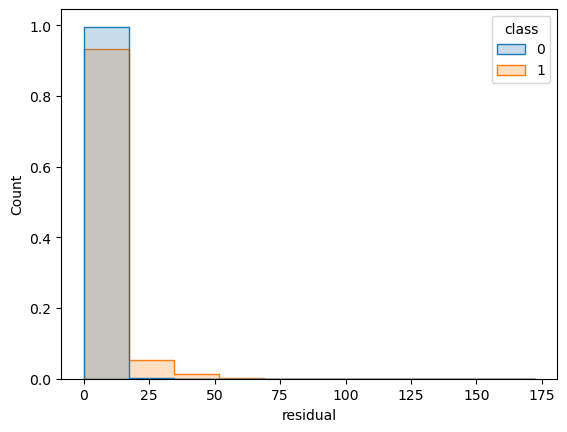

In [172]:
sns.histplot(data=df, x='residual', hue='class', weights='normalized_frequency', element='step', common_norm=False)

<Axes: xlabel='residual', ylabel='Count'>

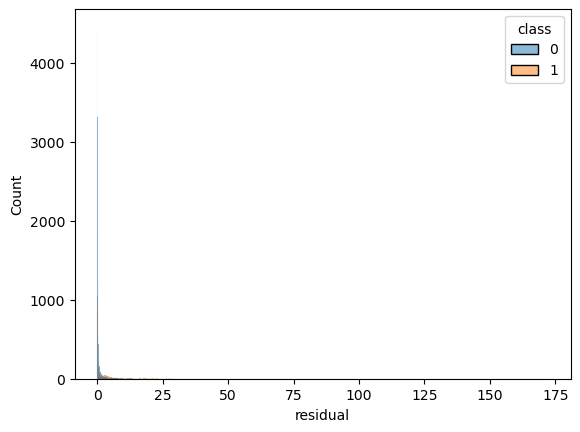

In [171]:
#HISTOGRAM
%matplotlib inline

sns.histplot(data=df, x='residual', hue='class')

In [ ]:
#MACHINE LEARNINGGGGG!!!!!!

In [153]:
X = df['residual']
y = df['class']
print(X.shape, y.shape)

(24698,) (24698,)


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [155]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [156]:
X_train.shape

(17288, 1)

In [157]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [159]:
pred = classifier.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [164]:
accuracy = accuracy_score(y_test, pred)
report = classification_report(y_test, pred)

In [165]:
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.6484480431848852
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      5058
           1       0.45      0.44      0.44      2352

    accuracy                           0.65      7410
   macro avg       0.59      0.59      0.59      7410
weighted avg       0.65      0.65      0.65      7410



<IPython.core.display.Javascript object>


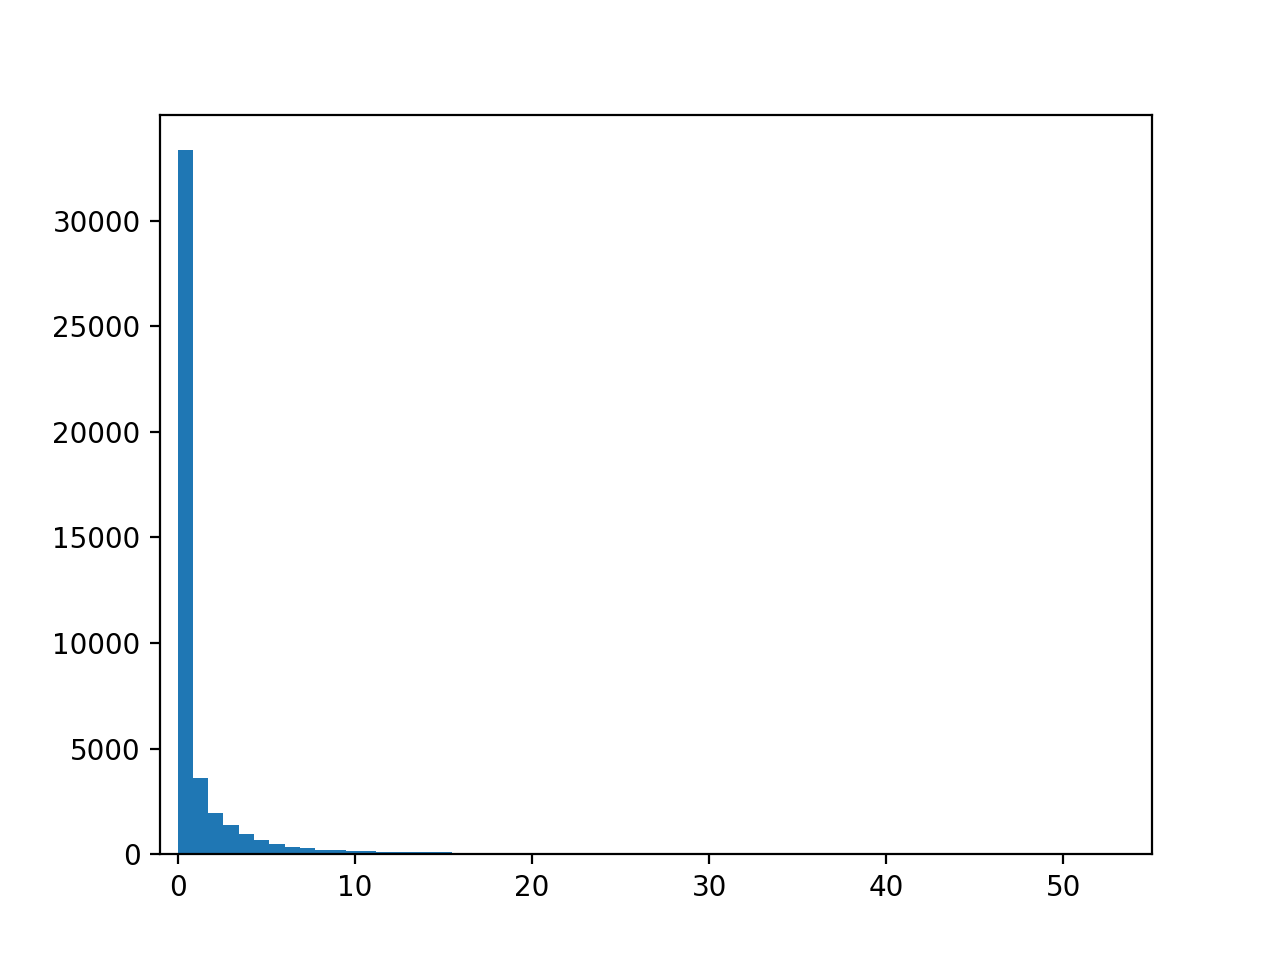

(-1.0, 55.0)

In [16]:
%matplotlib notebook
plt.hist(r, 200)
plt.xlim(-1,55)